# Customer Churn Modeling
<img src="https://miro.medium.com/max/1024/1*YRq10sAcj2ScV2TirdSKBg.png" height =500 width=500></imag>

##### Can you predict if bank customers will turnover next cycle?

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

# Machine Learning Process Step by Step
<img src="https://miro.medium.com/max/1399/0*C_ibLD-RscbJzjMq.png" height =500 width=500></imag>



### Importing Libraries
- numpy
- matplotlib
- seaborn
- scikit-learn
- imblearn


In [1]:
# Importing Librarys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score, roc_curve #To evaluate our model
from sklearn.metrics import plot_confusion_matrix
from sklearn.externals import joblib
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pylab import rcParams

import warnings
warnings.filterwarnings("ignore")

C:\Users\MacBook\.conda\envs\AI\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


### Loading Dataset
<a>https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling </a>

__Given below are columns information__
1. RowNumber
2. CustomerId
3. Surname
4. CreditScore
5. Geography
6. Gender
7. Age
8. Tenure
9. Balance
10. NumOfProductsHow many accounts, bank account affiliated products the person has
11. HasCrCard
12. IsActiveMemberSubjective, but for the concept
13. EstimatedSalary
14. Exited Did they leave the bank after all?

In [2]:
# Using pandas 
# Data downloaded from above link and stored in local folder
dataframe = pd.read_csv('Churn_Modelling.csv')

## Exploratory Data Analysis
- __Summarizing, Describing and Data Distributions__
- __Univariate and bivariate Analysis__
- __Outliers and their influence__
- __Metadata errors__
- __Missing Data__
- __Correlation analysis between variables__


In [3]:
dataframe.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Find out the total number of rows and columns
dataframe.shape

(10000, 14)

In [5]:
#columns and their corresponding data types,along with finding whether they contain null values or not
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# The describe() function in pandas is very handy in getting various summary statistics.
# This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data
dataframe.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Checking data sampling
dataframe.Exited.unique()
dataframe.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

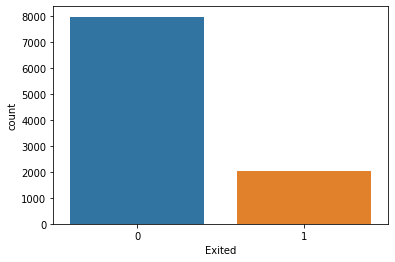

In [8]:
# Data Visualization
import seaborn as sns
sns.countplot(dataframe['Exited'],label="Count")
plt.show()

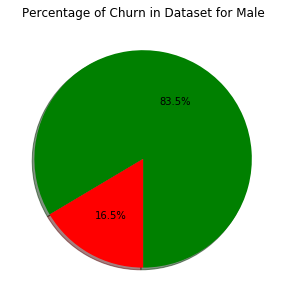

In [9]:
# Data to plot
male_dataframe = dataframe[dataframe.Gender=="Male"]
sizes = male_dataframe['Exited'].value_counts(sort = True)
colors = ["Green","Red"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes,  colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset for Male')
plt.show()

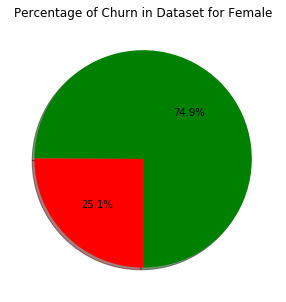

In [10]:
# Data to plot
female_dataframe = dataframe[dataframe.Gender=="Female"]
sizes = female_dataframe['Exited'].value_counts(sort = True)
colors = ["Green","Red"] 
rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes,  colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset for Female')
plt.show()

### Correlation Analysis

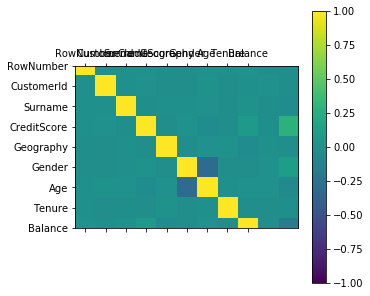

In [11]:
correlations = dataframe.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(dataframe.columns)
ax.set_yticklabels(dataframe.columns)
rcParams['figure.figsize'] = 10,10
plt.show()

### Finding Outliers

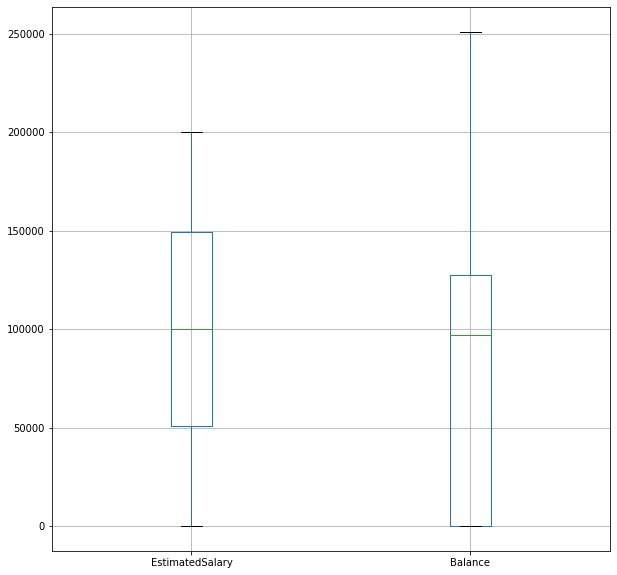

In [12]:
rcParams['figure.figsize'] = 10,10
boxplot = dataframe.boxplot(column=['EstimatedSalary', 'Balance'])

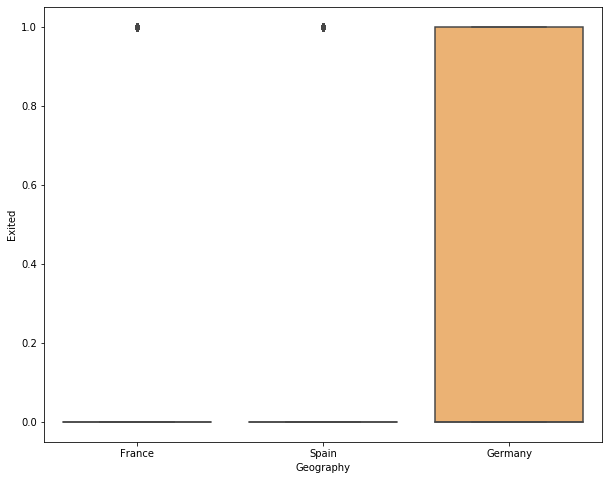

In [13]:
rcParams['figure.figsize'] = 10,8
sns.boxplot(x="Geography",y="Exited",data=dataframe,palette='rainbow')

## Data Preprocessing
- __Imputing Missing Data__
- __Handling Unbalanced Data(Under Sampling and OverSampling)__
- __Handling Outliers__
- __Transforming, Encoding, Scaling, and Shuffling__

### Imputing Missing Data 

In [14]:
# removing null values to avoid errors  
dataframe.dropna(inplace = True)

## Feature Engineering
- __Adding or dropping features__
- __Combining multiple features into one feature__
- __Binning__
- __One Hot Encoding__

In [15]:
#remove the fields from the data set that we don't
# want to include in our model
del dataframe['RowNumber']
del dataframe['CustomerId']
del dataframe['Surname']


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
label1 = LabelEncoder()
dataframe['Geography'] = label1.fit_transform(dataframe['Geography'])

In [18]:
label2 = LabelEncoder()
dataframe['Gender'] = label2.fit_transform(dataframe['Gender'])

In [19]:
features_dataframe = pd.get_dummies(dataframe, columns=['Geography'])

In [20]:
#Remove the Exited from the feature data
del features_dataframe['Exited']

In [21]:
X = features_dataframe.values
y = dataframe['Exited']
features_dataframe.columns


Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_0',
       'Geography_1', 'Geography_2'],
      dtype='object')

### Handling Imbalanced Data

In [22]:
# apply near miss
import imblearn
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
X, y = nr.fit_sample(X, y)
X[100]

array([6.3700000e+02, 0.0000000e+00, 4.4000000e+01, 2.0000000e+00,
       0.0000000e+00, 2.0000000e+00, 1.0000000e+00, 0.0000000e+00,
       1.4966565e+05, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00])

In [23]:
y[100]

0

In [24]:
#Split the data set in a traning set (80%) and a test set(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

## Modelling

### Training and Model Selection

In [25]:
# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [26]:
%%time
# to feed the random state
seed = 7
results = []
names = []
scoring = 'recall'

# Models = [RandomForestClassifier(), LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), 
# LinearDiscriminantAnalysis(),GaussianNB(), SVC(), GradientBoostingClassifier(), XGBClassifier()]
# prepare models
models = []
models.append(('LogisticRegression         :', LogisticRegression()))
models.append(('LinearDiscriminantAnalysis :', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier       :', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier     :', DecisionTreeClassifier()))
models.append(('GaussianNB                 :', GaussianNB()))
models.append(('RandomForestClassifier     :', RandomForestClassifier()))
models.append(('SVC                        :', SVC(gamma='auto')))
models.append(('GradientBoostingClassifier :', GradientBoostingClassifier()))
models.append(('XGBClassifier              :', XGBClassifier()))
print('Accuracy_Score :')
print('----------------')
for name, model in models:
    model.fit(X_train,y_train)
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(name,accuracy_score(y_test, model.predict(X_test))*100)


Accuracy_Score :
----------------
LogisticRegression         : 86.99386503067484
LinearDiscriminantAnalysis : 86.99386503067484
KNeighborsClassifier       : 86.13496932515338
DecisionTreeClassifier     : 88.95705521472392
GaussianNB                 : 86.99386503067484
RandomForestClassifier     : 92.63803680981594
SVC                        : 50.061349693251536
GradientBoostingClassifier : 92.26993865030676
XGBClassifier              : 92.14723926380368
Wall time: 21.3 s


### Choosed GradientBoostingClassifier Algorithm and List Metrics 

In [27]:
# From above models we can see, 
# We are getting highest accuracy and better values of precision and recall for XGBClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print('Accuracy = ',accuracy_score(y_test, model.predict(X_test)))
print('classification_report = ',classification_report(y_test, model.predict(X_test)))

Accuracy =  0.9226993865030675
classification_report =                precision    recall  f1-score   support

           0       0.90      0.95      0.92       408
           1       0.94      0.90      0.92       407

    accuracy                           0.92       815
   macro avg       0.92      0.92      0.92       815
weighted avg       0.92      0.92      0.92       815



### Hyper Parameter Tuning

In [28]:
%%time
parameters = {
    "learning_rate": [0.01, 0.025, 0.05],
    "max_depth":[1,3,5],
    "max_features":["log2","sqrt"],
    "n_estimators":[10,50,100,150]
    }

grid_search = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.score(X_train, y_train))
print(grid_search.best_params_)

0.9334151580239337
{'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'log2', 'n_estimators': 100}
Wall time: 1min 6s


### Train model based on best hyper parameter

In [29]:
%%time
#Seting the Hyper Parameters
model = GradientBoostingClassifier(learning_rate= 0.05, 
                                   max_depth = 5, 
                                   max_features = 'sqrt', 
                                   n_estimators= 50)
model.fit(X_train, y_train)
print('Accuracy = ',accuracy_score(y_test, model.predict(X_test)))
print('classification_report = ',classification_report(y_test, model.predict(X_test)))

Accuracy =  0.9153374233128835
classification_report =                precision    recall  f1-score   support

           0       0.88      0.97      0.92       408
           1       0.96      0.86      0.91       407

    accuracy                           0.92       815
   macro avg       0.92      0.92      0.92       815
weighted avg       0.92      0.92      0.92       815

Wall time: 203 ms


## Model Evaluation

#### Accuracy and Classification_report

In [30]:
print('Accuracy = ',accuracy_score(y_test, model.predict(X_test)))
print('classification_report = ',classification_report(y_test, model.predict(X_test)))

Accuracy =  0.9153374233128835
classification_report =                precision    recall  f1-score   support

           0       0.88      0.97      0.92       408
           1       0.96      0.86      0.91       407

    accuracy                           0.92       815
   macro avg       0.92      0.92      0.92       815
weighted avg       0.92      0.92      0.92       815



### Plot Confusion Matrix

Confusion matrix, without normalization
[[394  14]
 [ 55 352]]
Normalized confusion matrix
[[0.96568627 0.03431373]
 [0.13513514 0.86486486]]


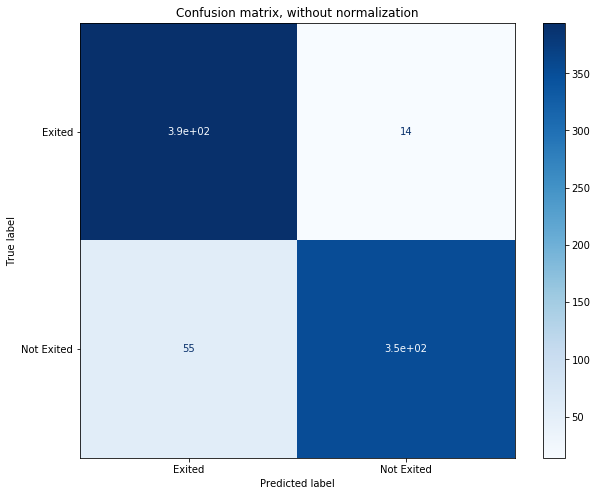

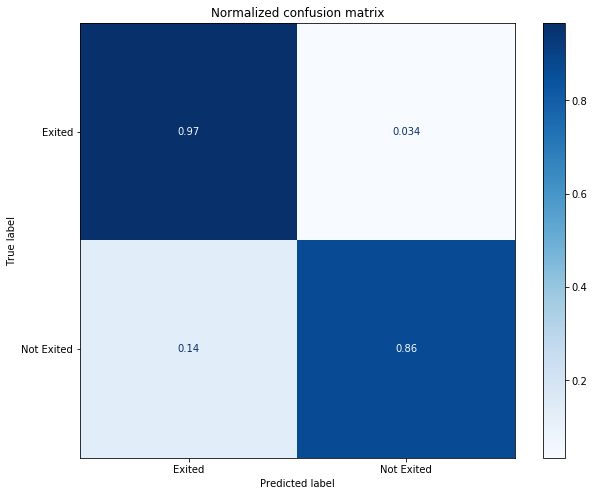

In [31]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=['Exited','Not Exited'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

### ROC Curve

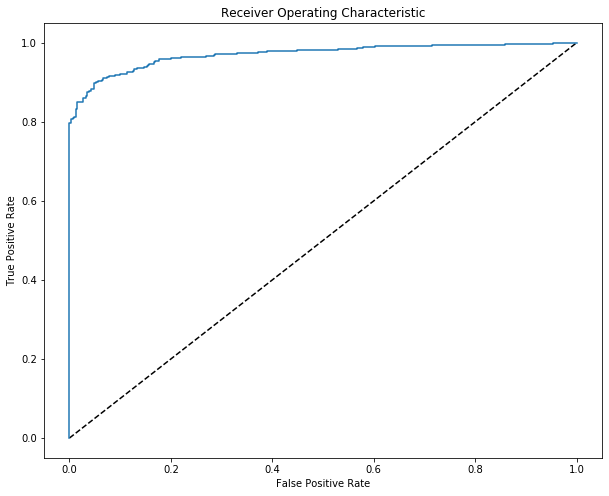

In [32]:
y_pred_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

### Save Model for Production Deployment

In [33]:
# Save the trained model to a file so we can use it in other programs
joblib.dump(model,"customer_churn_mlmodel.pkl")

['customer_churn_mlmodel.pkl']

### List Important Features

In [34]:
# These are the features labels from out data set
feature_labels = np.array(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_0','Geography_1', 'Geography_2'])

In [35]:
# Create a numpy array based on the model's feature importances
importance = model.feature_importances_

In [36]:
# Sort the feature labels based on the feature importance rankings from the model
feature_indexes_by_importance = importance.argsort()

In [37]:
# Print each feature label, from most important to least important (reverse order)
for index in feature_indexes_by_importance:
    print("{} - {:.2f}%".format(feature_labels[index], (importance[index] * 100.0)))

HasCrCard - 0.12%
Tenure - 0.40%
CreditScore - 0.71%
Gender - 0.74%
EstimatedSalary - 0.90%
Geography_2 - 0.95%
Geography_0 - 0.97%
IsActiveMember - 1.78%
Age - 9.46%
Geography_1 - 11.83%
NumOfProducts - 26.70%
Balance - 45.45%
